![](https://novascriptscentral.org/wp-content/uploads/2020/07/diabetes-1200x430.jpg)
image from [link](https://novascriptscentral.org/diabetes/)

* #### Feature engineering is the process of working with variables to create new ones or enhance existing ones.

* #### Feature engineering is the process of creating new variables from raw data.

* #### Most of machine learning is data preprocessing, the rest is machine learning.

### Dataset Details

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv") 

In [66]:
def check_df(dataframe, head=5):
    print("#################### Head ####################")
    print(dataframe.head(head))
    print("################### Shape ####################")
    print(dataframe.shape)
    print("#################### Info #####################")
    print(dataframe.info())
    print("################### Nunique ###################")
    print(dataframe.nunique())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("################## Quantiles #################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    print("################# Duplicated ###################")
    print(dataframe.duplicated().sum())

check_df(df)

#################### Head ####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21        0
4            0      137             40             35      168 43.100                     2.288   33        1
################### Shape ####################
(768, 9)
#################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                   

In [67]:
# First, we need to identify the numerical and categorical variables in the data.

def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, num_cols, cat_but_car 


cat_cols, num_cols, cat_but_car = grab_col_names(df)


In [68]:
def num_summary(dataframe, col_name, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        fig = plt.subplots(figsize=(6, 4))
        sns.distplot(df[col_name],
             kde=False,
             kde_kws={"color": "g", "alpha": 0.3, "linewidth": 5, "shade": True})
        plt.show(block=True)

count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


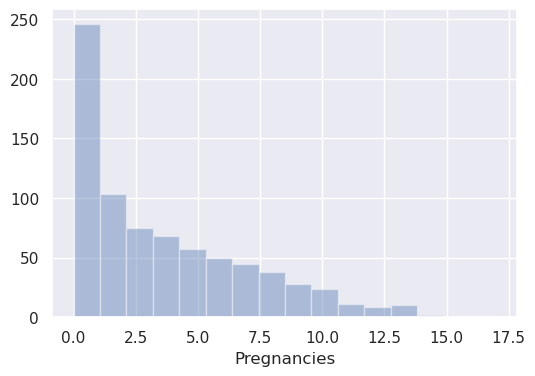

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


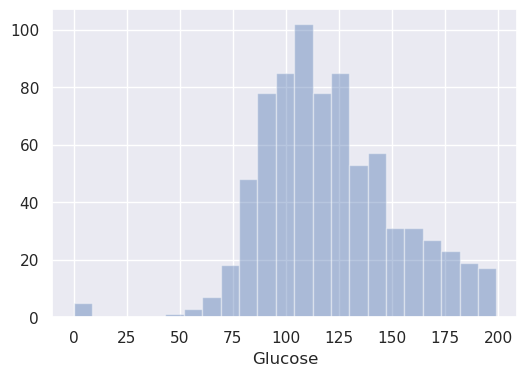

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


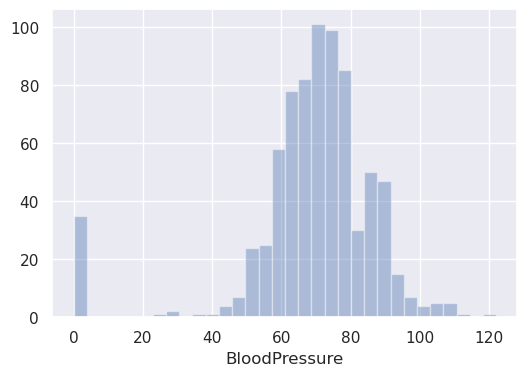

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


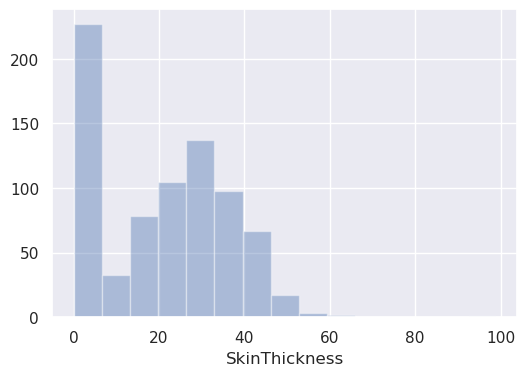

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


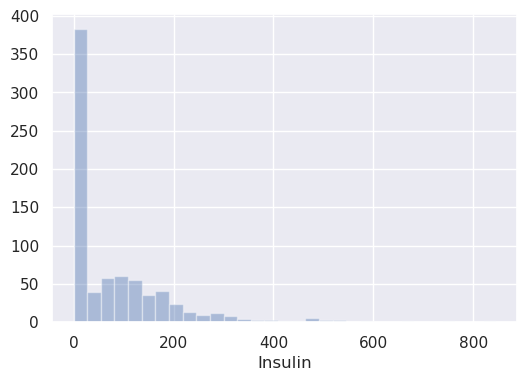

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


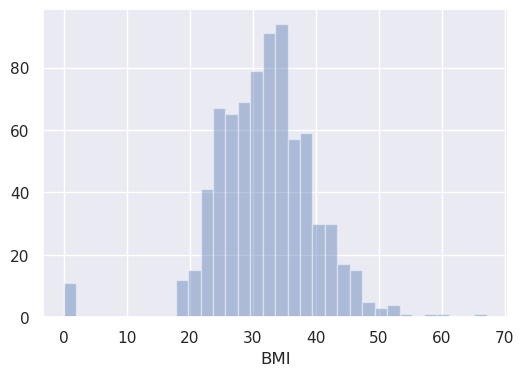

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


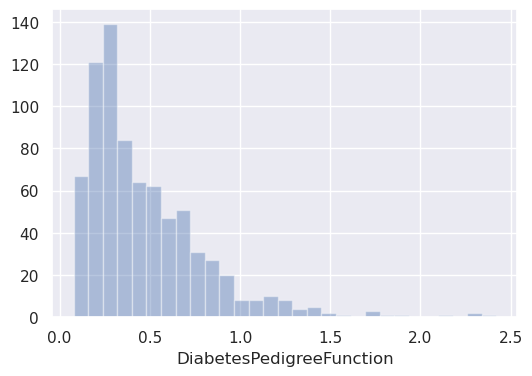

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


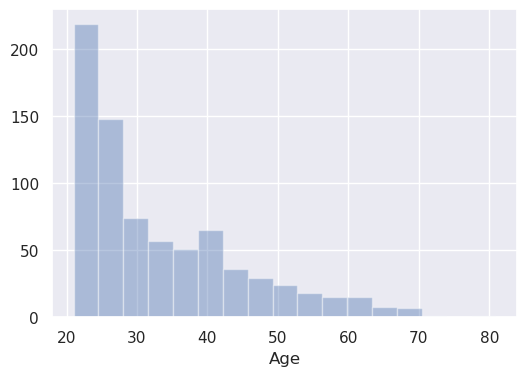

In [69]:
# We are analyzing the numeric variables.

for col in num_cols:
    num_summary(df, col, plot = True)

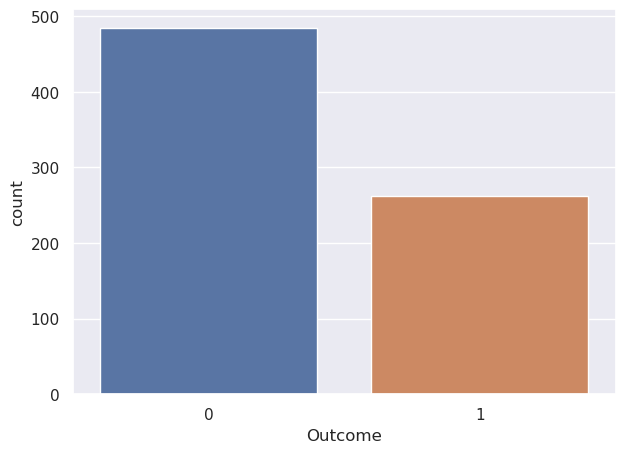

In [91]:
# We are analyzing the categorical variables.

for col in cat_cols:
    fig =  plt.subplots(figsize=(7, 5))
    sns.countplot(x = df[col], data = df)
    plt.show(block = True)
    

         Pregnancies
Outcome             
0              3.298
1              4.866


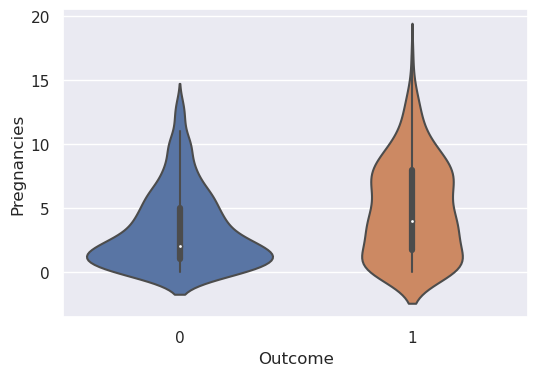

         Glucose
Outcome         
0        109.980
1        141.257


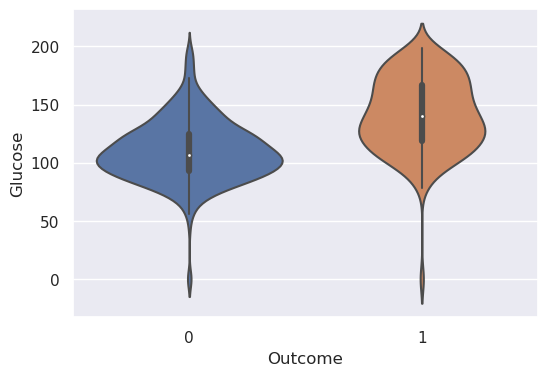

         BloodPressure
Outcome               
0               68.184
1               70.825


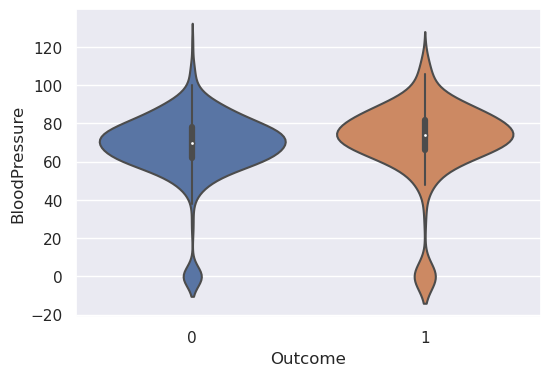

         SkinThickness
Outcome               
0               19.664
1               22.164


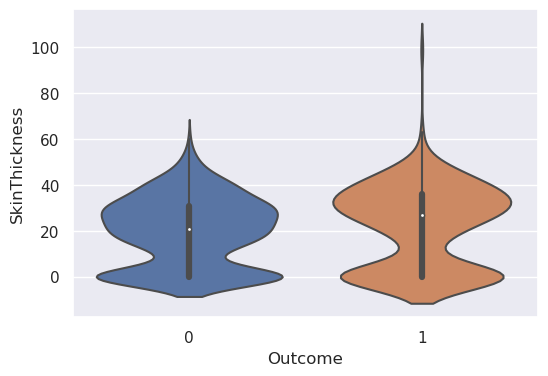

         Insulin
Outcome         
0         68.792
1        100.336


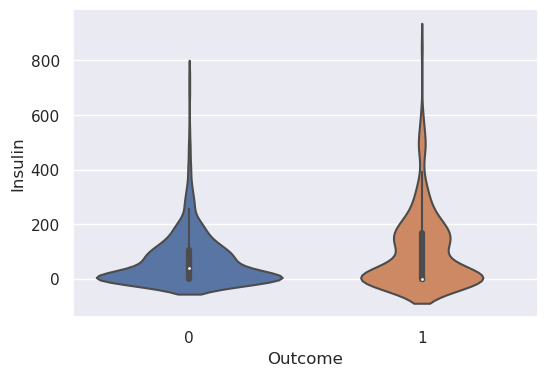

           BMI
Outcome       
0       30.304
1       35.143


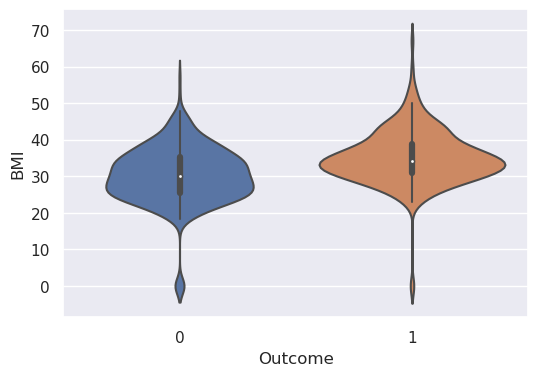

         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


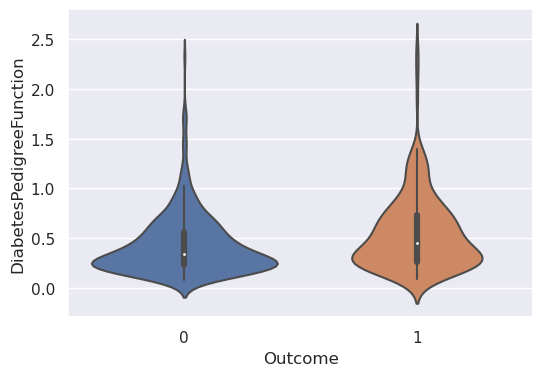

           Age
Outcome       
0       31.190
1       37.067


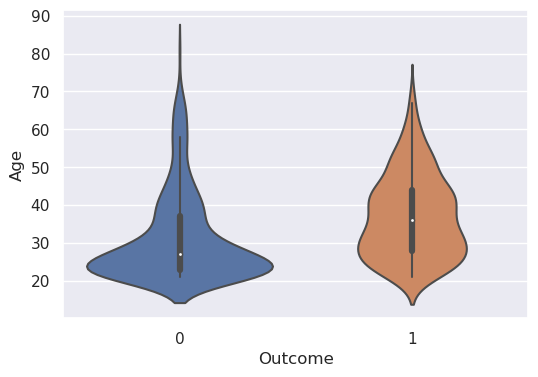

In [71]:
# We are analyzing the target variable.

for col in num_cols:
    print(df.groupby('Outcome').agg({col: 'mean'}))
    fig = plt.subplots(figsize=(6, 4))
    sns.violinplot(x=df["Outcome"], y=df[col])
    plt.show(block=True)

In [72]:
# We are analyzing the outliers.

# To detect outliers, we need to set threshold values.
def outlier_thresholds(dataframe, col_name, q1=0.04, q3=0.96):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


# We are checking the variables that have outliers.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    

for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


In [73]:
# We replace the outliers with the threshold values we determined.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
    
for col in num_cols:
    replace_with_thresholds(df, col)
    
check_outlier(df, num_cols)

False

#### Local Outlier Factor(LOF)

We may encounter outliers when we consider certain values together, even though they may not be outliers on their own.

This situation is examined under the analysis of multivariate outliers.

LOF (Local Outlier Factor) method is a technique used for identifying outliers in high-dimensional datasets, also known as a multivariate outlier detection method.

For example, when the BMI score is below 20 and the SkinThickness value is 60, etc. This is not very likely to happen.

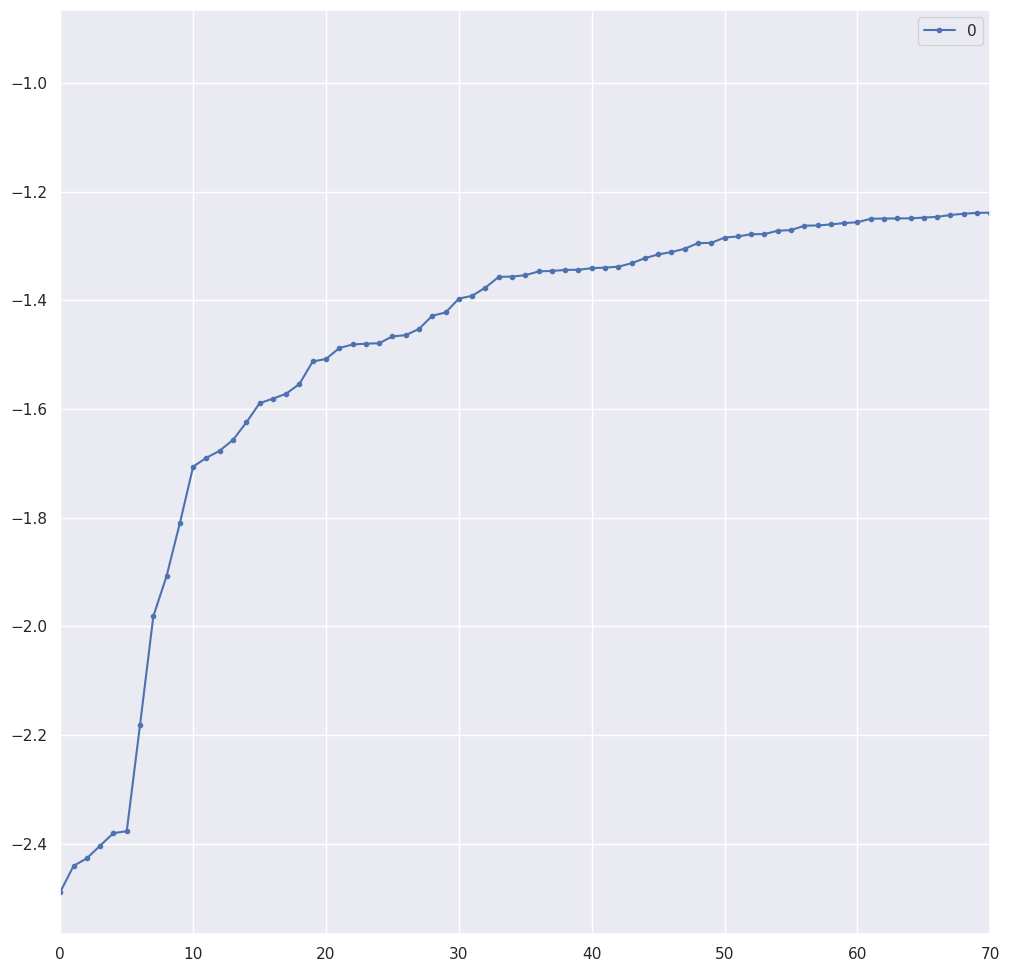

In [74]:
# We generate our scores with LOF.
clf= LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_

# We are examining the scores through a graph.
scores = pd.DataFrame(np.sort(df_scores))   
scores.plot(stacked=True, xlim=[0, 70], style='.-')
plt.show()

# This can be interpreted as the point where the rate of change starts to slow down after the 10th value.

In [75]:
# We set the 10th point as the threshold.
th= np.sort(df_scores)[10]

# We are looking at the outlier observation units that fall below this threshold.
df[df_scores < th]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1.000,189,60,23.000,812.500,30.100,0.398,59.000,1
75,1.000,0,48,20.000,0.000,24.700,0.140,22.000,0
106,1.000,96,122,0.000,0.000,22.400,0.207,27.000,0
182,1.000,0,74,20.000,23.000,27.700,0.299,21.000,0
228,4.000,197,70,39.000,744.000,36.700,2.329,31.000,0
342,1.000,0,68,35.000,0.000,32.000,0.389,22.000,0
349,5.000,0,80,32.000,0.000,41.000,0.346,37.000,1
459,9.000,134,74,33.000,60.000,25.900,0.460,81.000,0
502,6.000,0,68,41.000,0.000,39.000,0.727,41.000,1
579,2.000,197,70,99.000,0.000,34.700,0.575,62.000,1


In [76]:
# We remove these outlier observations from the dataset.
df = df[~(df_scores < th)]

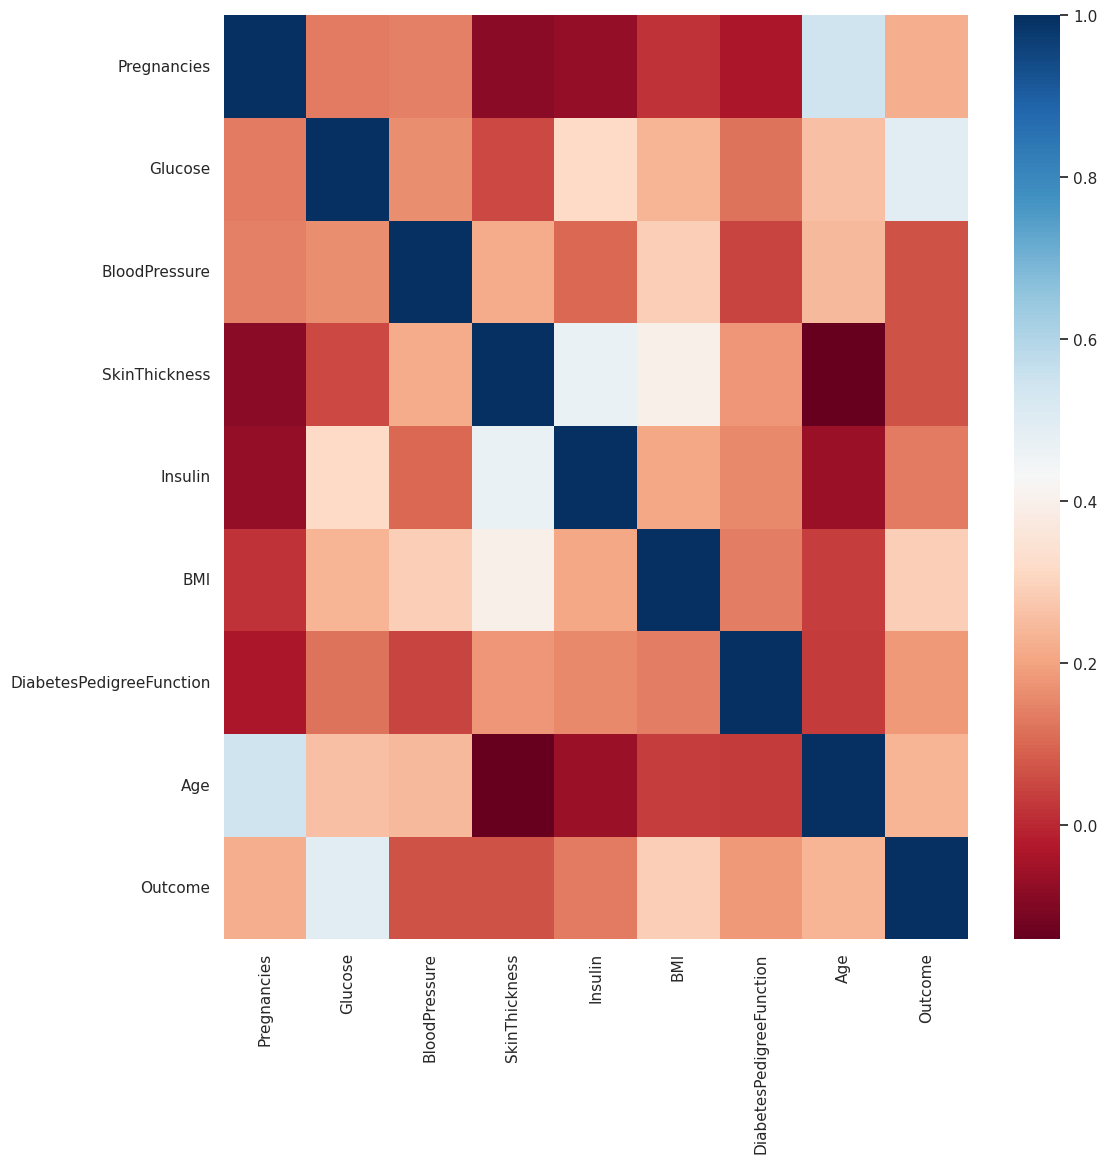

In [77]:
# We are examining our correlation analysis.

corr = df[df.columns].corr()

sns.set(rc={"figure.figsize" : (12,12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [78]:
# We are analyzing the missing values.

df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

It seems no missing values.

But at first we saw that there are meaningless values.

For example: Variables such as Glucose, Insulin, Skin Thickness and Blood Pressure cannot be 0.

We will treat these variables as NaN.

In [79]:
# pregnancies can be 0, we leave it out
num_cols_miss = [col for col in num_cols if col not in "Pregnancies"]

# We set 0 values to NaN
for col in num_cols_miss:
    df[col] = np.where(df[col] == 0, np.NaN, df[col])
    
    
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               226
Insulin                     368
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [80]:
# We have identified missing values and we need to fill them in.

# "I will fill in these missing values with the medians of the variable groups that are most closely related."

# I am filling in the missing values in insulin using the median values of insulin with respect to glucose."
df["Glucose_qcut"]=pd.qcut(df['Glucose'], 5)
df.groupby("Glucose_qcut")["Insulin"].median()
df["Insulin"] = df["Insulin"].fillna(df.groupby("Glucose_qcut")["Insulin"].transform("median"))

# I am filling in the missing values in SkinThickness using the median values of SkinThickness with respect to BMI.
df["BMI_qcut"] = pd.qcut(df['BMI'], 5)
df.groupby("BMI_qcut")["SkinThickness"].median()
df["SkinThickness"] = df["SkinThickness"].fillna(df.groupby("BMI_qcut")["SkinThickness"].transform("median"))

# I am filling in the missing values in Pregnancies using the median values of Pregnancies with respect to Age.
df["Age_qcut"] = pd.qcut(df['Age'], 3)
df.groupby("Age_qcut")["Pregnancies"].median()
df["Pregnancies"] = df["Pregnancies"].fillna(df.groupby("Age_qcut")["Pregnancies"].transform("median"))

# I am filling in the missing values in BloodPressure using the median values of BloodPressure with respect to Age.
df.groupby("Age_qcut")["BloodPressure"].median()
df["BloodPressure"] = df["BloodPressure"].fillna(df.groupby("Age_qcut")["BloodPressure"].transform("median"))

In [81]:
# We are deleting the remaining small number of missing values and the newly created variables."

df.dropna(inplace=True)
df.drop(["Age_qcut", "BMI_qcut", "Glucose_qcut"], axis=1, inplace=True)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,747.000,3.854,3.377,0.000,1.000,3.000,6.000,17.000
Glucose,747.000,121.669,30.338,44.000,99.500,117.000,141.000,199.000
BloodPressure,747.000,72.329,12.080,24.000,64.000,72.000,80.000,114.000
SkinThickness,747.000,28.495,9.402,7.000,21.000,29.000,35.000,63.000
Insulin,747.000,142.725,86.814,14.000,87.500,131.000,175.000,680.000
BMI,747.000,32.471,6.935,18.200,27.500,32.300,36.600,67.100
DiabetesPedigreeFunction,747.000,0.471,0.324,0.078,0.244,0.375,0.628,2.420
Age,747.000,33.187,11.529,21.000,24.000,29.000,41.000,72.000
Outcome,747.000,0.351,0.478,0.000,0.000,0.000,1.000,1.000


In [82]:
# Now we are creating new variables.

df.loc[(df['Glucose'] < 140) & (df['BMI'] <= 25), 'NEW_GLU_BMI'] = 'thin_-'

df.loc[(df['Glucose'] < 140) & (df['BMI'] > 25) & (df['BMI'] < 30), 'NEW_GLU_BMI'] = 'fat_-'

df.loc[(df['Glucose'] < 140) & (df['BMI'] >= 30), 'NEW_GLU_BMI'] = 'obese_-'

df.loc[(df['Glucose'] >= 140) & (df['BMI'] <= 25), 'NEW_GLU_BMI'] = 'thin_+'

df.loc[(df['Glucose'] >= 140) & (df['BMI'] > 25) & (df['BMI'] < 30), 'NEW_GLU_BMI'] = 'fat_+'

df.loc[(df['Glucose'] >= 140) & (df['BMI'] >= 30), 'NEW_GLU_BMI'] = 'obese_+'

In [83]:
# Now we are creating new variables.

df.loc[(df['Age'] < 46) & (df['SkinThickness'] < 46), 'NEW_Age_SKIN'] = 'age<_skin<'

df.loc[(df['Age'] < 46) & (df['SkinThickness'] >= 46), 'NEW_Age_SKIN'] = 'age<_skin>'

df.loc[(df['Age'] >= 46) & (df['Age'] < 56) & (df['SkinThickness'] < 46), 'NEW_Age_SKIN'] = 'age--_skin<'

df.loc[(df['Age'] >= 46) & (df['Age'] < 56) & (df['SkinThickness'] >= 46), 'NEW_Age_SKIN'] = 'ages--_skin>'

df.loc[(df['Age'] >= 56) & (df['SkinThickness'] < 46), 'NEW_Age_SKIN'] = 'age>_skin<'

df.loc[(df['Age'] >= 56) & (df['SkinThickness'] >= 46), 'NEW_Age_SKIN'] = 'age>_skin>'

In [84]:
# Now we are creating new variables.

def calculate_glucose_age(row):
    if row['Age'] < 26:
        return row['Glucose']
    elif row['Age'] < 36:
        return row['Glucose'] * 1.2
    elif row['Age'] < 46:
        return row['Glucose'] * 1.4
    elif row['Age'] < 55:
        return row['Glucose'] * 1.6
    elif row['Age'] < 64:
        return row['Glucose'] * 1.8
    elif row['Age'] < 72:
        return row['Glucose'] * 2
    else:
        return row['Glucose'] * 2.4

df['Glucose_age'] = df.apply(calculate_glucose_age, axis=1)

In [85]:
# Now we are creating new variables.

df["FUNC_GLU"] = df["DiabetesPedigreeFunction"] * df["Glucose"]


df["SKIN_INS"] = df["SkinThickness"] * df["Insulin"]


df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_GLU_BMI,NEW_Age_SKIN,Glucose_age,FUNC_GLU,SKIN_INS
0,6.000,148.000,72.000,35.000,208.500,33.600,0.627,50.000,1,obese_+,age--_skin<,236.800,92.796,7297.500
1,1.000,85.000,66.000,29.000,64.500,26.600,0.351,31.000,0,fat_-,age<_skin<,102.000,29.835,1870.500
2,8.000,183.000,64.000,18.000,208.500,23.300,0.672,32.000,1,thin_+,age<_skin<,219.600,122.976,3753.000
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,fat_-,age<_skin<,89.000,14.863,2162.000
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1,obese_-,age<_skin<,164.400,313.456,5880.000


In [86]:
# We are performing the encoding process.

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df= one_hot_encoder(df, ohe_cols)

df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_age,FUNC_GLU,SKIN_INS,NEW_GLU_BMI_fat_-,NEW_GLU_BMI_obese_+,NEW_GLU_BMI_obese_-,NEW_GLU_BMI_thin_+,NEW_GLU_BMI_thin_-,NEW_Age_SKIN_age<_skin<,NEW_Age_SKIN_age<_skin>,NEW_Age_SKIN_age>_skin<,NEW_Age_SKIN_age>_skin>,NEW_Age_SKIN_ages--_skin>
0,6.000,148.000,72.000,35.000,208.500,33.600,0.627,50.000,1,236.800,92.796,7297.500,0,1,0,0,0,0,0,0,0,0
1,1.000,85.000,66.000,29.000,64.500,26.600,0.351,31.000,0,102.000,29.835,1870.500,1,0,0,0,0,1,0,0,0,0
2,8.000,183.000,64.000,18.000,208.500,23.300,0.672,32.000,1,219.600,122.976,3753.000,0,0,0,1,0,1,0,0,0,0
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,89.000,14.863,2162.000,1,0,0,0,0,1,0,0,0,0
4,0.000,137.000,40.000,35.000,168.000,43.100,2.288,33.000,1,164.400,313.456,5880.000,0,0,1,0,0,1,0,0,0,0


In [87]:
# We are performing standardization processes.

mms = MinMaxScaler()    
df[num_cols] = mms.fit_transform(df[num_cols])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_age,FUNC_GLU,SKIN_INS,NEW_GLU_BMI_fat_-,NEW_GLU_BMI_obese_+,NEW_GLU_BMI_obese_-,NEW_GLU_BMI_thin_+,NEW_GLU_BMI_thin_-,NEW_Age_SKIN_age<_skin<,NEW_Age_SKIN_age<_skin>,NEW_Age_SKIN_age>_skin<,NEW_Age_SKIN_age>_skin>,NEW_Age_SKIN_ages--_skin>
0,0.353,0.671,0.533,0.500,0.292,0.315,0.234,0.569,1,236.800,92.796,7297.500,0,1,0,0,0,0,0,0,0,0
1,0.059,0.265,0.467,0.393,0.076,0.172,0.117,0.196,0,102.000,29.835,1870.500,1,0,0,0,0,1,0,0,0,0
2,0.471,0.897,0.444,0.196,0.292,0.104,0.254,0.216,1,219.600,122.976,3753.000,0,0,0,1,0,1,0,0,0,0
3,0.059,0.290,0.467,0.286,0.120,0.202,0.038,0.000,0,89.000,14.863,2162.000,1,0,0,0,0,1,0,0,0,0
4,0.000,0.600,0.178,0.500,0.231,0.509,0.944,0.235,1,164.400,313.456,5880.000,0,0,1,0,0,1,0,0,0,0


In [88]:
# We are applying our machine learning model.

from sklearn.ensemble import RandomForestClassifier

y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=26)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy_score(y_pred, y_test)


# We can see the success rate of the model

0.8311111111111111

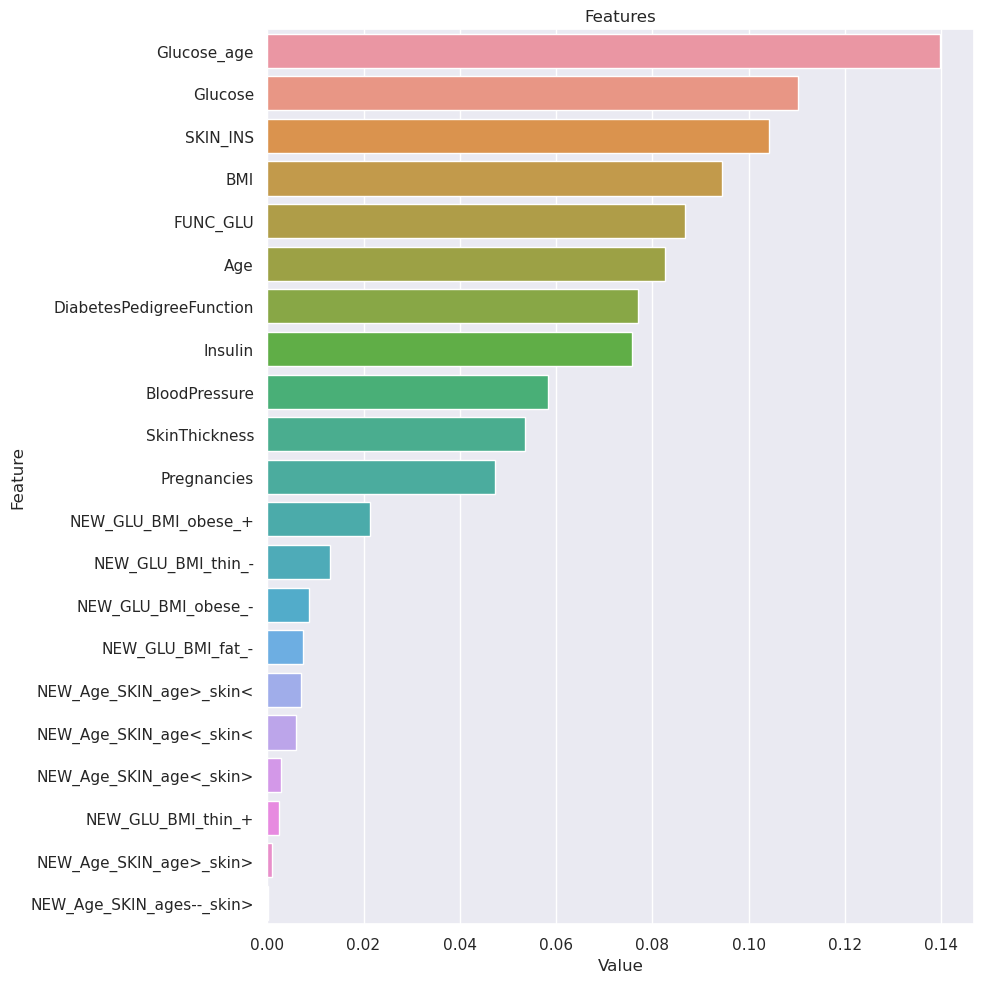

In [89]:
# We observe the effects of the variables we added later on the dependent variable.

def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize = (10, 10))
    sns.set(font_scale = 1)
    sns.barplot(x = "Value", y = "Feature", data = feature_imp.sort_values(by = "Value", ascending = False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)

plot_importance(rf_model, X_train)